In [ ]:
!pip install -U langgraph

In [1]:
def weather(str):
  return "Hi! Well.. I have no idea... But... "

In [2]:
def rainy_weather(str):
  return str + " Its going to rain today. Carry an umbrella."

In [3]:
def sunny_weather(str):
  return str + " Its going to be sunny today. Wear sunscreen."

In [4]:
import random
from typing import Literal

def forecast_weather(str)->Literal["rainy", "sunny"]:
  if random.random() < 0.5:
    return "rainy"
  else:
    return "sunny"

In [5]:
from langgraph.graph import Graph, START, END

workflow = Graph()
workflow.add_node("weather", weather)
workflow.add_node("rainy", rainy_weather)
workflow.add_node("sunny", sunny_weather)

workflow.add_edge(START, "weather")
workflow.add_conditional_edges("weather", forecast_weather)
workflow.add_edge("rainy", END)
workflow.add_edge("sunny", END)
app = workflow.compile()

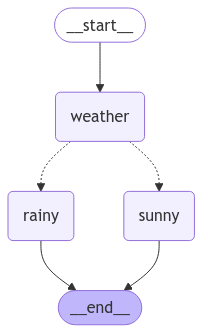

In [6]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))

In [9]:
app.invoke('Hi! What does the weather look like? ')

'Hi! Well.. I have no idea... But...  Its going to rain today. Carry an umbrella.'

In [10]:
app.invoke("How much is 2+2")

'Hi! Well.. I have no idea... But...  Its going to rain today. Carry an umbrella.'